In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))



# Exploratory Data Analysis (EDA):

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df.head()

,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
train_df.shape

(12180, 85)

In [6]:
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]
test_df.head()

,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [7]:
test_df.shape

(4702, 85)

In [8]:
train_df['loan_status'].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [9]:
train_df['loan_status'].unique()

array(['low_risk', 'high_risk'], dtype=object)

In [10]:
train_df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [11]:
train_df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [12]:
test_df['loan_status'].value_counts()

high_risk    2351
low_risk     2351
Name: loan_status, dtype: int64

In [13]:
test_df['loan_status'].unique()

array(['low_risk', 'high_risk'], dtype=object)

In [14]:
test_df['verification_status'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [15]:
test_df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [16]:
train_df.columns

Index(['index', 'loan_amnt', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'm

In [17]:
train_df = train_df.drop(['index'], axis = 1)
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [18]:
# Drop the null columns where all values are null
train_df = train_df.dropna(axis='columns', how='all')
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [19]:
# Drop the null rows
train_df = train_df.dropna()
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [20]:
test_df = test_df.drop(['index'], axis = 1)
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [21]:
# Drop the null columns where all values are null
test_df = test_df.dropna(axis='columns', how='all')
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [22]:
# Drop the null rows
test_df = test_df.dropna()
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [23]:
train_df.shape

(12180, 84)

In [24]:
test_df.shape

(4702, 84)

# Preprocessing Data:

In [89]:
# # Create our target-2019
y_train_df = train_df['loan_status']

In [90]:
# # Create our target-2020
y_test_df = test_df['loan_status']

In [91]:
# Converting output labels to 0 and 1---2019
y_train = LabelEncoder().fit_transform(y_train_df)
len(y_train)

12180

In [92]:
# Converting output labels to 0 and 1---2020
y_test = LabelEncoder().fit_transform(y_test_df)
len(y_test)

4702

In [93]:
# Create our features-2019
X_train_df = train_df.drop('loan_status', axis=1)
X_train_df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,0.0,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,2.0,0.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,0.0,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,0.0,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,0.0,2.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,0.0,0.0,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,4.0,0.0,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,0.0,1.0,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,0.0,0.0,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [30]:
# Create our features-2020
X_test_df = test_df.drop('loan_status', axis=1)
X_test_df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,n,19.75,0.0,1.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,n,11.52,2.0,0.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,n,6.74,0.0,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,n,12.13,0.0,2.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,n,16.08,0.0,3.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,n,15.74,0.0,0.0,...,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,n,26.81,0.0,0.0,...,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,10000.0,0.2305,387.36,RENT,33000.0,Verified,n,38.51,0.0,2.0,...,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,n,16.36,0.0,1.0,...,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N


## Converting Catigorical Data to Numeric:

In [31]:
# Convert categorical data to numeric and separate target feature for training data
# One-hot encoding the entire dataframe 

# 2019 data
X_train_dummies = pd.get_dummies(X_train_df)
X_train = X_train_dummies
print (X_train.columns)
X_train

#2020 data
X_test_dummies = pd.get_dummies(X_test_df)
X_test = X_test_dummies

# Missing column assignment to 2020 data
X_test['debt_settlement_flag_Y'] = 0
print (X_test.columns)
X_test

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,1,1,0,1,0,1,0,1,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,1,0,1,1,0,1,0,1,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,1,1,1,0,1,0,1,0,1,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,1,0,1,1,0,1,0,1,0


In [32]:
# Checking same number of columns in both datasets
for i in range(0, len(X_test.columns)):
    if X_train.columns[i] != X_test.columns[i]:
        print(f'X_train_columns {X_train.columns[i]}')
        print(f'X_test_columns {X_test.columns[i]}')

In [33]:
# Split our data into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X_train_dummies, y_label, random_state=1)

## Model Considerations:

### Creating and comparing two models on the data: a logistic regression, and a random forests classifier.

In [34]:
# You will be creating and comparing two models on this data: a logistic regression, and a random forests classifier. 
# Before you create, fit, and score the models, make a prediction as to which model you think will perform better. 
# You do not need to be correct! Write down (in markdown cells in your Jupyter Notebook or in a separate document) 
# your prediction, and provide justification for your educated guess.

### Revisit the Preprocessing: Scale the data

In [35]:
# Before re-fitting the LogisticRegression and Random Forest Classifier models on the scaled data, 
# make another prediction about how you think scaling will affect the accuracy of the models. 
# Write your predictions down and provide justification.

## Prediction for Better Model Performance:

In [36]:
# Random Forest Classifier:
#=========================
# Here we are dealing with the categorical data. Instead of a single, complex tree, a random forests algorithm will 
# sample the data and build several smaller, simpler decisions trees built from a subset of the data.
# Each tree (weak classifier), when combined and aggregated, form a strong classifier. 
# When doing this over and over again, we get a good estimater. This model also doesn't use 
# all the features everytime.This thorough process prevent the problem of over fitting of data. More the number of 
# iterations, the more stable and good fit, the model is. My prediction is that random forests classifier model will 
# perform better on this data.

In [37]:
# Logistic Regression Model:
#==========================
# Since we are using categorization for two different possible outcomes, we can choose logistic regression model for 
# testing the data. The accuracy score shows how good our model is in predicting the outcome of the datasets. 
# But the problem is that, just  by looking at one accuracy score, we can not unpack true positives, true negatives, 
# false positives, and false negatives. And many times we need that information to achieve better accuracy in our outcomes.
# For this reason, we use confusion matrix, that tells how good our model is in prdicting those factors.
# Accuracy is the percentage of correct predictions. Accuracy = tp+tn/(tp+tn+fp+fn)
# Sensitivity is how often we correctly identify a positive value. Sensitivity/Recall = tp/(tp+fn)
# Precision is the percentage of positive predictions that are correct. Precision = tp/(tp+fp) 


## Prediction for accuracy of the models by Scaling the data:

In [38]:
# The data always need to be processed before it can be used in a machine learning algorithm. 
# One of the preprocessing step is'Saling'. Since machine learning algorithms are sensitive to large data values, 
# so the features need to be scaled to standerized ranges. StandardScaler is used when we do not have complete 
# knowledge od data.It scales the data to have mean of 0 and variance of 1.
# A clear difference in prediction accuracies is observed when scaling/normalization is applied. 
# For this reason my prediction is that the score accuracy will improve by scaling/normalization.

## Logestic Regression Model Testing on Unscaler Data:

In [39]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [40]:
# # Train the Logistic Regression model on the unscaled data and print the model score
classifier.fit(X_train, y_train)

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [42]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6504105090311987
Testing Data Score: 0.5165886856656742


In [43]:
X_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,1,1,0,1,0,1,0,1,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,1,0,1,1,0,1,0,1,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,1,1,1,0,1,0,1,0,1,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,1,0,1,1,0,1,0,1,0


In [44]:
len(y_test)

4702

In [45]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Predicting the y values from the X_test data
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[ 711, 1640],
       [ 633, 1718]], dtype=int64)

In [46]:
# The accuracy of the model on the test data is TP + TN / (TP + FP + TN + FN)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (1085 + 886) / (1085 + 613 + 461 + 886)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5165886856656742


## Logestic Regression Testing on Scaler Data:

In [47]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-0.39311205,  0.73658452, -0.08760946, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 0.35168119, -0.19171582, -0.10342722, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 0.25400339, -0.32080462, -0.20434179, ..., -0.17149859,
         0.02026518, -0.02026518],
       ...,
       [-1.34791257,  0.85997823, -1.28263075, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.23438563, -1.00231755, -0.11361032, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.23438563,  0.69292214,  0.10586953, ..., -0.17149859,
         0.02026518, -0.02026518]])

In [48]:
type(X_train_scaled)

numpy.ndarray

In [49]:
type(y_train)

numpy.ndarray

In [50]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [51]:
# Train the Logistic Regression model on the scaled data and print the model score

In [52]:
classifier.fit(X_train_scaled, y_train)

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [53]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [54]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7078817733990148
Testing Data Score: 0.767333049766057


In [55]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test_scaled[:10]))}')

Actual:		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Predicted:	[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [56]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[1789,  562],
       [ 532, 1819]], dtype=int64)

In [57]:
# The accuracy of the model on the test data is TP + TN / (TP + FP + TN + FN)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (1144 + 985) / (1144 + 514 + 985 + 402)
print(f"Accuracy: {accuracy}")

Accuracy: 0.767333049766057


In [58]:
tn, fp, fn, tp

(1789, 562, 532, 1819)

In [59]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2351
           1       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702



## Random Forest Classifier Model Testing on Unscaler Data:

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [61]:
# Fit random forest model --> "bagged decision trees"
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6437686091025095


In [68]:
# Fit extremely random tree --> even more random but faster
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=1000).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.5725223309230115


In [70]:
# Fit adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=6)).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6454700127605274


## Random Forest Classifier Model Testing on Scaler Data:

In [69]:
# Fit random forest model --> "bagged decision trees"
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6439812845597618


In [65]:
# Fit extremely random tree --> even more random but faster
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.557422373458103


In [71]:
# Fit adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=10)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6720544449170566


In [107]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.61      0.83      0.71      2351
           1       0.74      0.48      0.58      2351

    accuracy                           0.65      4702
   macro avg       0.68      0.65      0.64      4702
weighted avg       0.68      0.65      0.64      4702

Training Score: 1.0
Testing Score: 0.6548277328796257


In [108]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1961,  390],
       [1233, 1118]], dtype=int64)

## Fearture Selection:

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
# Fit random forest and get training and testing score
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6439812845597618


In [74]:
# Get feature importance
features = clf.feature_importances_
features = sorted(features, reverse=True)
features

[0.09566233001579401,
 0.05151149688497933,
 0.04757216484028377,
 0.043537804473858265,
 0.04353148598514338,
 0.03453857276198891,
 0.030022970870554055,
 0.0297674035420612,
 0.02949828514526881,
 0.016950644786794453,
 0.01691190092693851,
 0.016403274415348,
 0.016351752801785302,
 0.015963583368309806,
 0.0159223447104284,
 0.015894578058338705,
 0.015750822974447895,
 0.015716057320683346,
 0.015255533874006052,
 0.014634837853715195,
 0.014491150379290602,
 0.014264214121788733,
 0.014201781982243736,
 0.013938716028400444,
 0.013776706628994129,
 0.01373462572069385,
 0.013576501579498853,
 0.013574568706290561,
 0.013429248654420517,
 0.013229974738221156,
 0.012059214778506603,
 0.011978615695441983,
 0.011862657098533074,
 0.011739441162797433,
 0.010795260337374704,
 0.01032341722224799,
 0.010134892980535782,
 0.00946630434559167,
 0.009135268627181382,
 0.008832630008488334,
 0.008818656999873538,
 0.008818506300315077,
 0.008589911822551845,
 0.008172066931467149,
 0.00

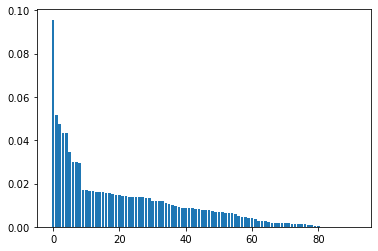

In [75]:
# Note the "noisy" features
plt.bar(x = range(len(features)), height=features)
plt.show()

In [79]:
# Use SelectFromModel to only get the important features
from sklearn.feature_selection import SelectFromModel

# create selection object by passing in the model fitted above (passing the random forest classifier--clf)
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(clf)
sel

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                 random_state=1))

In [77]:
# Fit selection object to the training set
sel.fit(X_train_scaled, y_train)

# Displays an array indicating whether given feature is important
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [129]:
X_train_scaled.shape

(12180, 92)

In [130]:
X_test_scaled.shape

(4702, 92)

In [131]:
X_selected_train_scaled = sel.transform(X_train_scaled)
X_selected_train_scaled.shape

(12180, 34)

In [132]:
X_selected_test_scaled = sel.transform(X_test_scaled)
X_selected_test_scaled.shape

(4702, 34)

## # Fit random forest on selected features and get training and testing score

In [145]:
# # Now let's see it with selected dataset
# Fit random forest and get training and testing score
clf_train = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_selected_train_scaled, y_train)
clf_test = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_selected_test_scaled, y_test)

print(f'Training Score: {clf_train.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_test.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [146]:
y_pred = clf_test.predict(X_selected_test_scaled)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [147]:
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf_train.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_test.score(X_selected_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      2351

    accuracy                           1.00      4702
   macro avg       1.00      1.00      1.00      4702
weighted avg       1.00      1.00      1.00      4702

Training Score: 1.0
Testing Score: 1.0


In [148]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[2351,    0],
       [   0, 2351]], dtype=int64)